# Overfitting and Underfitting Data Sets
Bias- error introduced in the model, difference between actual vs predicted
Variance How much the data set is scattered
Overfitting - happens when a model focuses on too many details in the training set
Underfitting - high bias and high variance in the data, detectable as it exhibits poor performance in the Training Set
- Model is underfit it it's Trained  with limited features like Temperature and Speed
- If a model performs well on Training data and Testing data, it's a good model
- If a model performs well with Training data but NOT with Testing data, it's Overfit
- If a model does NOT perform well on both Training and Testing data, it's Underfit


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [ ]:
X, y = make_classification(n_samples=9000, n_features=18, n_informative=4, n_redundant=12, random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
train_scores, test_scores = list(), list()

In [ ]:
values = [i for i in range(1, 21)]

In [ ]:
for i in values:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.823, test: 0.826
>2, train: 0.883, test: 0.884
>3, train: 0.897, test: 0.902
>4, train: 0.915, test: 0.905
>5, train: 0.927, test: 0.917
>6, train: 0.955, test: 0.939
>7, train: 0.965, test: 0.949
>8, train: 0.973, test: 0.948
>9, train: 0.978, test: 0.951
>10, train: 0.983, test: 0.949
>11, train: 0.988, test: 0.945
>12, train: 0.992, test: 0.947
>13, train: 0.995, test: 0.944
>14, train: 0.997, test: 0.944
>15, train: 0.998, test: 0.944
>16, train: 0.999, test: 0.942
>17, train: 0.999, test: 0.942
>18, train: 0.999, test: 0.943
>19, train: 1.000, test: 0.944
>20, train: 1.000, test: 0.943


#Next Identify an Overfitting or Underfitting Problem
This model performed well in the Training data set but NOT in the Test Data set which indicates Overfitting!

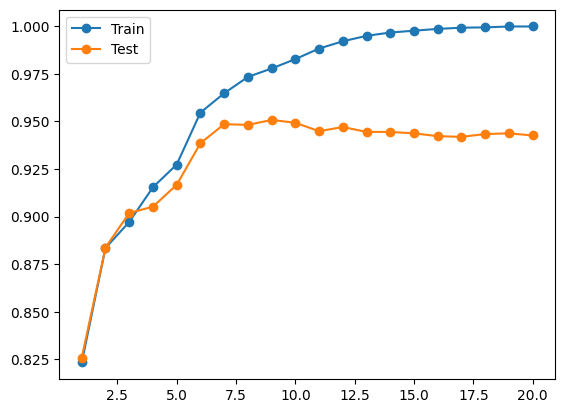

In [ ]:
pyplot.plot(values, train_scores, 'o-', label='Train')
pyplot.plot(values, test_scores, 'o-', label='Test')
pyplot.legend()
pyplot.show()

#Import Cross-Validation
Create a param grid


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth':[2,4,6,8,10,20], 'min_samples_split':[5, 10, 20, 50, 100]}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, n_jobs = -1, scoring = 'accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

# Difference has now reduced
But, we need to finetune even more to further reduce the differenc between the Training data set and the Test data set to resolve the Overfitting problem

In [ ]:
clf_best_estimator_

In [ ]:
print(accuracy_score(y_train, clf.best_estimator_.predict(X_train)))
print(accuracy_score(y_test, clf.best_estimator_.predict(X_test)))

0.9795238095238096
0.9507407407407408
